# Hands On ML Chapter 3 - Support Vector Machines

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_moons

## Linear SVM

SVM not only seperate classes but also stays as far away from the closest training instances as possible. You can imagine SVM as a widest possible street. The instances located on the edgde of the "street" are called support vectors.

In [35]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.float64) #Iris-Virginica

SVMs are sensitive to the feature scales. You should use StandarScaler before SVM.

In some cases it is impossible to have street without instances on it. With parameter C you can control balance between wide of street and instances on it. Smaller C value leads to a wider street but with more margin violations. Higher C leads to smaller margin and fewer margin violations.

In [36]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
))

svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

Alternatives:
* SVC(kernel="linear", C=1) - slower
* SGDClassifier(loss="hinge", alpha=1/(m\*C ) - applies regular Stochastic Gradient Descent to train a linear SVM Classifier, can be useful with huge datasets and with online classification tasks

## Nonlinear SVM Classification

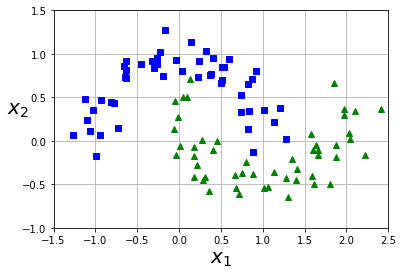

In [42]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

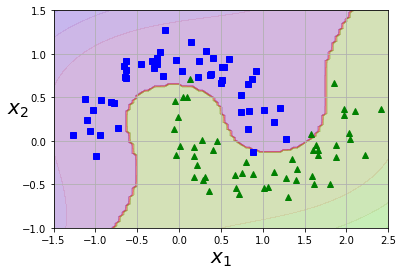

In [44]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

polynomial_svm_clf.fit(X, y)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### Polynomial Kernel

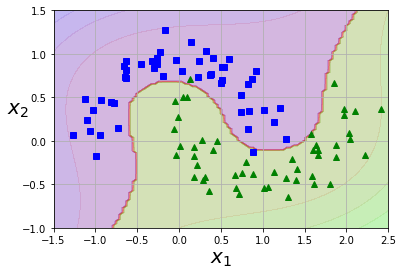

In [52]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])